In [2]:
%cd ujian-tengah-semester-IsmiRosiaDwianti

/content/ujian-tengah-semester-IsmiRosiaDwianti


In [3]:
from google.colab import files

# Upload file
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Membaca file CSV
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Menampilkan 5 baris pertama dari dataset
print("Contoh data:")
print(df.head())

# Menampilkan daftar nama fitur (kolom)
print("\nFitur yang tersedia:")
print(df.columns.tolist())

# Menampilkan jumlah missing values per fitur
print("\nJumlah missing values per fitur:")
print(df.isnull().sum())

# Menghapus kolom tidak relevan
df = df.drop(columns=['id'])

# Tangani missing value
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Cek kembali missing values setelah imputasi
print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum())

# Encoding fitur kategorikal
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Membaca file CSV
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Menampilkan 5 baris pertama dari dataset
print("Contoh data:")
print(df.head())

# Menampilkan daftar nama fitur (kolom)
print("\nFitur yang tersedia:")
print(df.columns.tolist())

# Menampilkan jumlah missing values per fitur
print("\nJumlah missing values per fitur:")
print(df.isnull().sum())

# Menghapus kolom 'id' (tidak relevan)
df = df.drop(columns=['id'])

# Tangani missing value pada kolom 'bmi' dengan mean imputation
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Cek kembali missing values setelah imputasi
print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum())

# Encoding fitur kategorikal
# Label Encoding untuk kolom 'gender', 'ever_married', 'smoking_status'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

# Normalisasi fitur numerik (age, avg_glucose_level, bmi) dengan MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Menyimpan hasil preprocessing ke dalam file baru
df.to_csv('data_bersih.csv', index=False)

# Memberitahukan pengguna bahwa file sudah disimpan
print("\nData yang sudah diproses telah disimpan ke 'data_bersih.csv'.")


# Normalisasi fitur numerik
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Menyimpan hasil preprocessing ke dalam file baru
df.to_csv('data_bersih.csv', index=False)


Contoh data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Fitur yang tersedia:
['id', 'gender', 'age

Evaluasi Model Decision Tree:
Accuracy: 0.6066536203522505
              precision    recall  f1-score   support

           0       0.97      0.58      0.72       908
           1       0.20      0.83      0.32       114

    accuracy                           0.61      1022
   macro avg       0.58      0.71      0.52      1022
weighted avg       0.88      0.61      0.68      1022



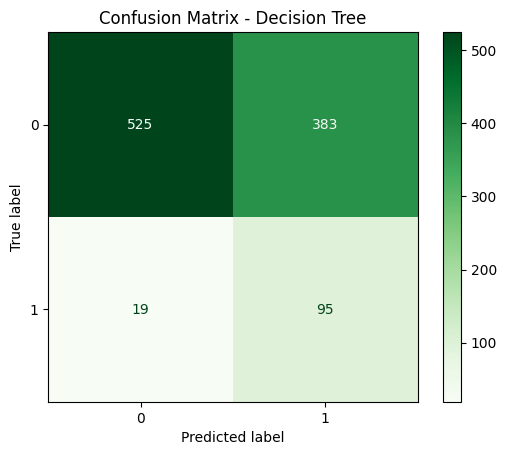

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('data_bersih.csv')

# Memisahkan fitur dan target
X = df.drop('hypertension', axis=1)
y = df['hypertension']

# Membagi data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
dt_model.fit(X_train_bal, y_train_bal)

# Melakukan prediksi dan evaluasi
y_pred_dt = dt_model.predict(X_test)
print("Evaluasi Model Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualisasi confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)

# Plot dan simpan gambar
fig, ax = plt.subplots()
disp_dt.plot(cmap='Greens', ax=ax)
plt.title("Confusion Matrix - Decision Tree")
plt.savefig("visualisasi.png")  # Menyimpan gambar
plt.show()


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/uts_23758014.ipynb" "/content/[REPOSITORY]/"

In [33]:
!git add visualisasi.png
!git commit -m “Visualisasi_hasil_model”
!git push origin main

[main 0bc62eb] “Visualisasi_hasil_model”
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 visualisasi.png
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 16.75 KiB | 16.75 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/IET-Polinela/ujian-tengah-semester-IsmiRosiaDwianti.git
   21e6dce..0bc62eb  main -> main


In [34]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
